## Splashing Lionesses
### Brandon Sanders, Evan Lancaster and Shruti Sharma
![Image](https://orig00.deviantart.net/cb09/f/2016/229/7/1/untitled_by_wolf_minori-dae8b6g.jpg)

In [37]:
import pandas as pd 
import matplotlib as mpl 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from IPython.display import Image
from IPython.display import IFrame 
from IPython.core.display import HTML 


In [2]:
import os
import logging
import datetime
import json
import glob

In [3]:
# ~/.local/bin/aws s3 ls s3://247machinelearning-curated/kinesis_analytics/2017/10/01/06/
file = 'rawData/StreamToS3-5-2017-10-01-06-01-22-d7ab4054-39fd-4b46-8b38-721d9ca1e987'
df = open(file, 'r').read()
df = df.replace('}{','}\n{')
# df

In [4]:

df = df.splitlines()

# print(df) 

In [5]:
json.loads('{' + df[1][1:-1] + '}')

{'authorKey': 1000669260,
 'contentKey': 100468322,
 'pathRoot': 'GALLERY',
 'publishedDate': '9/7/2017 7:28:00 PM',
 'referrer': None,
 'siteKey': 25100288,
 'timeStamp': 'Sun, 01 Oct 2017 06:01:23 GMT',
 'userAgent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_5 like Mac OS X) AppleWebKit/601.1.46 (KHTML, like Gecko) Version/9.0 Mobile/13G36 Safari/601.1',
 'userId': '58ad9ceb-31db-4d0f-96fe-f835d8aef2a2',
 'userStatus': 'Guest'}

In [6]:
data = []
for record in df:
    rec = json.loads('{' + record[1:-1] + '}')
    data.append(rec)

data
data = pd.DataFrame(data)
data.head()

,authorKey,contentKey,pathRoot,publishedDate,referrer,siteKey,timeStamp,userAgent,userId,userStatus
0,2.818048e+06,2.723480e+09,GALLERY,3/31/2017 11:14:00 AM,http://m.facebook.com/,24444928,"Sun, 01 Oct 2017 06:01:25 GMT",Mozilla/5.0 (Linux; Android 7.0; SM-T810 Build...,452df109-10bb-4f1b-94bf-63cfe9563885,Guest
1,1.000669e+09,1.004683e+08,GALLERY,9/7/2017 7:28:00 PM,None,25100288,"Sun, 01 Oct 2017 06:01:23 GMT",Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_5 like ...,58ad9ceb-31db-4d0f-96fe-f835d8aef2a2,Guest
2,1.431110e+09,2.322008e+09,BOLT,9/29/2017 3:19:43 PM,https://www.facebook.com/,25624576,"Sun, 01 Oct 2017 06:01:23 GMT",Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,de486139-a746-4279-aced-973ecf3dd260,Guest
3,1.000669e+09,3.424520e+09,GALLERY,9/20/2017 9:39:42 PM,http://m.facebook.com,25231360,"Sun, 01 Oct 2017 06:01:23 GMT",Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...,96853476-ed9c-454d-9ce8-de8d06da4e0d,Guest
4,1.000669e+09,1.557006e+09,GALLERY,8/29/2017 9:11:35 PM,http://m.facebook.com/,24903680,"Sun, 01 Oct 2017 06:01:23 GMT",Mozilla/5.0 (Linux; Android 6.0.1; Z981 Build/...,fa984a50-c4a6-419d-83a1-e03e314fb939,Guest


In [7]:
data['siteKey'].unique()

array([24444928, 25100288, 25624576, 25231360, 24903680, 25427968,
       24838144, 24248320, 24313856, 23986176, 75300864, 69664768,
       24182784, 24969216, 24379392,  2490368, 24051712, 25165824,
       24510464, 23789568, 24707072, 24576000, 25690112, 72155136,
       73072640, 25493504, 25296896, 25362432, 73138176])

In [8]:
data['pathRoot'].unique()

array(['GALLERY', 'BOLT', 'NFL', 'CONTENTGALLERY', 'VIDEO', 'HOMEPAGE',
       'ARTICLE', 'USERSUBSCRIPTION'], dtype=object)

In [9]:
data['userStatus'].unique()

array(['Guest', 'Registered'], dtype=object)

In [11]:
data['referrer'].unique()

array(['http://m.facebook.com/', None, 'https://www.facebook.com/',
       'http://m.facebook.com',
       'https://scout.com/nfl/browns/Board/The-Watercooler-105323',
       'https://scout.com/nfl/vikings/Board/Purple-Thoughts-102855',
       'https://www.google.com/',
       'http://lm.facebook.com/l.php?u=http%3A%2F%2Fden.247sports.com%2FGallery%2FTom-Brady-takes-jersey-sales-lead-for-Week-Three-108162195%2FGallerySlides%2F704564&h=ATPZN9bNDxYHSa9ZCq56RxWoQhHmCe7bZeiRz9Q78XQSg8njSe2pF5-M0s287f-V9dSUID67b4DdgeL7AnUY1BFNN3ITv0KDw_PUIkjeiO-TIyUTYF9yDh9Lem6lVgBZPeSu-WQmDc9HpB8',
       'https://lm.facebook.com/', 'android-app://m.facebook.com',
       'https://scout.com/nfl/vikings/Board',
       'https://lm.facebook.com/l.php?u=https%3A%2F%2Fnor.247sports.com%2FContentGallery%2FTwitter-erupts-after-Green-Bay-Packers-WR-DaVante-Adams-suffers--108144048%2F2&h=ATOhovza3nlK3DdiLi2Hfc8koi8hNP_QyASHSANOSOCF6b98nHjvBxjaTgpSI4ZUeTvjzbQJ3pH6uJmXZXXatOY4rToHIBsTFRtuxmxP&s=1&enc=AZPVTnIW4uYzZnuQo

In [12]:
siteK = data.iloc[:,4:6]
siteK

,referrer,siteKey
0,http://m.facebook.com/,24444928
1,None,25100288
2,https://www.facebook.com/,25624576
3,http://m.facebook.com,25231360
4,http://m.facebook.com/,24903680
5,http://m.facebook.com/,25427968
6,http://m.facebook.com/,24838144
7,http://m.facebook.com/,24248320
8,https://www.facebook.com/,24313856
9,None,24313856


In [13]:
data_sk = data.groupby('siteKey').count()
data_sk

,authorKey,contentKey,pathRoot,publishedDate,referrer,timeStamp,userAgent,userId,userStatus
siteKey,,,,,,,,,
2490368,284,284,286,284,277,286,286,286,286
23789568,2,2,2,2,2,2,2,2,2
23986176,23,23,23,23,22,23,23,23,23
24051712,6,6,6,6,6,6,6,6,6
24182784,3,3,3,3,3,3,3,3,3
24248320,371,371,371,371,337,371,371,371,371
24313856,81,81,81,81,77,81,81,81,81
24379392,105,105,105,105,76,105,105,105,105
24444928,164,164,164,164,161,164,164,164,164


In [14]:
sk = siteK.groupby('siteKey').count()
sk

,referrer
siteKey,
2490368,277
23789568,2
23986176,22
24051712,6
24182784,3
24248320,337
24313856,77
24379392,76
24444928,161


In [42]:
sk1 = data[data['siteKey'] == 24248320] #filter('siteKey'= 2490368,axis=0)
sk1.head()

,authorKey,contentKey,pathRoot,publishedDate,referrer,siteKey,timeStamp,userAgent,userId,userStatus
7,2.846949e+09,2.960328e+09,GALLERY,8/18/2017 10:28:47 AM,http://m.facebook.com/,24248320,"Sun, 01 Oct 2017 06:01:23 GMT",Mozilla/5.0 (Linux; Android 7.0; SM-G928V Buil...,3e2201c7-f3e0-49b2-be0d-4fa036f01f35,Guest
46,1.000669e+09,1.821575e+09,GALLERY,9/29/2017 11:28:18 AM,http://m.facebook.com,24248320,"Sun, 01 Oct 2017 06:01:28 GMT",Mozilla/5.0 (iPad; CPU OS 10_2 like Mac OS X) ...,674b5035-1ad9-4e10-aeb2-7af101e20b60,Guest
49,2.846949e+09,2.960328e+09,GALLERY,8/18/2017 10:28:47 AM,http://m.facebook.com/,24248320,"Sun, 01 Oct 2017 06:01:28 GMT",Mozilla/5.0 (Linux; Android 7.0; SM-G928V Buil...,3e2201c7-f3e0-49b2-be0d-4fa036f01f35,Guest
57,2.216100e+09,3.932620e+09,BOLT,9/28/2017 3:26:02 PM,android-app://m.facebook.com,24248320,"Sun, 01 Oct 2017 06:01:29 GMT",Mozilla/5.0 (Linux; Android 7.0; SM-G930T Buil...,43a165c5-1757-4e3a-8908-c689d9b3ae6e,Guest
77,2.846949e+09,2.960328e+09,GALLERY,8/18/2017 10:28:47 AM,http://m.facebook.com/,24248320,"Sun, 01 Oct 2017 06:01:32 GMT",Mozilla/5.0 (Linux; Android 7.0; SM-G928V Buil...,3e2201c7-f3e0-49b2-be0d-4fa036f01f35,Guest


In [16]:
sk1.referrer.unique()

array(['http://m.facebook.com/', 'http://m.facebook.com',
       'android-app://m.facebook.com', 'https://www.facebook.com/',
       'https://www.google.com/', 'android-app://com.google.android.gm',
       None, 'https://lm.facebook.com/', 'https://m.facebook.com/',
       'android-app://com.google.android.googlequicksearchbox',
       'http://www.google.com/'], dtype=object)

In [17]:
sk1_count = sk1.groupby('siteKey').count()
sk1_count


,authorKey,contentKey,pathRoot,publishedDate,referrer,timeStamp,userAgent,userId,userStatus
siteKey,,,,,,,,,
24248320,371,371,371,371,337,371,371,371,371


In [18]:
# ~/.local/bin/aws s3 ls --summarize --human-readable --recursive s3://247machinelearning-curated/kinesis_analytics/2017/10/ > output.csv
# size = pd.read_csv('size.csv')
# size = size[:-3]
# size.head()


In [81]:
# ~/.local/bin/aws s3 ls --summarize --human-readable --recursive 
# s3://247machinelearning-curated/kinesis_analytics/2017/10/ > output.csv
output = pd.read_csv('output.csv',delim_whitespace=True)
output.columns = ['modifiedOn', 'timeST', 'size', 'unit', 'name']
size = output[:-3]
size.tail()

,modifiedOn,timeST,size,unit,name
35250,2018-03-21,10:24:31,3.6,MiB,kinesis_analytics/2017/10/31/23/StreamToS3-5-2...
35251,2018-03-21,10:24:33,3.9,MiB,kinesis_analytics/2017/10/31/23/StreamToS3-5-2...
35252,2018-03-21,10:24:35,3.6,MiB,kinesis_analytics/2017/10/31/23/StreamToS3-5-2...
35253,2018-03-21,10:24:37,3.6,MiB,kinesis_analytics/2017/10/31/23/StreamToS3-5-2...
35254,2018-03-21,10:24:39,3.8,MiB,kinesis_analytics/2017/10/31/23/StreamToS3-5-2...


In [82]:
size['size'] = pd.to_numeric(size['size'], errors='coerce')


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
size.head()

,modifiedOn,timeST,size,unit,name
0,2018-03-20,20:18:20,1017.7,KiB,kinesis_analytics/2017/10/01/06/StreamToS3-5-2...
1,2018-03-20,20:18:21,1.0,MiB,kinesis_analytics/2017/10/01/06/StreamToS3-5-2...
2,2018-03-20,20:18:21,954.3,KiB,kinesis_analytics/2017/10/01/06/StreamToS3-5-2...
3,2018-03-20,20:18:22,732.8,KiB,kinesis_analytics/2017/10/01/06/StreamToS3-5-2...
4,2018-03-20,20:18:23,1016.0,KiB,kinesis_analytics/2017/10/01/06/StreamToS3-5-2...


In [84]:
# Changing size to mbs
def std_size(df, var1, var2, var3):
    if df[var1] == 'KiB' :
        df[var3] = df[var2]/1000
    else:
        df[var3] = df[var2]
    return df    

size = size.apply(lambda df: std_size(df, 'unit', 'size','sizeMb'), axis=1)

In [85]:
size.head()

,modifiedOn,timeST,size,unit,name,sizeMb
0,2018-03-20,20:18:20,1017.7,KiB,kinesis_analytics/2017/10/01/06/StreamToS3-5-2...,1.0177
1,2018-03-20,20:18:21,1.0,MiB,kinesis_analytics/2017/10/01/06/StreamToS3-5-2...,1.0000
2,2018-03-20,20:18:21,954.3,KiB,kinesis_analytics/2017/10/01/06/StreamToS3-5-2...,0.9543
3,2018-03-20,20:18:22,732.8,KiB,kinesis_analytics/2017/10/01/06/StreamToS3-5-2...,0.7328
4,2018-03-20,20:18:23,1016.0,KiB,kinesis_analytics/2017/10/01/06/StreamToS3-5-2...,1.0160


In [86]:
# creating new col for date, time and date time from filenames
size['Day'] = size['name'].str.slice(26, 28)
size['DayHour'] = size['name'].str.slice(26, 31)
size['Hour'] = size['name'].str.slice(29, 31)


In [87]:
size_high = size.sort_values('sizeMb', ascending=False)
size_high.head(5)

,modifiedOn,timeST,size,unit,name,sizeMb,Day,DayHour,Hour
34132,2018-03-21,09:53:38,8.8,MiB,kinesis_analytics/2017/10/31/00/StreamToS3-5-2...,8.8,31,31/00,00
34131,2018-03-21,09:53:34,8.4,MiB,kinesis_analytics/2017/10/31/00/StreamToS3-5-2...,8.4,31,31/00,00
34134,2018-03-21,09:53:44,8.3,MiB,kinesis_analytics/2017/10/31/00/StreamToS3-5-2...,8.3,31,31/00,00
34133,2018-03-21,09:53:41,8.3,MiB,kinesis_analytics/2017/10/31/00/StreamToS3-5-2...,8.3,31,31/00,00
34223,2018-03-21,09:58:02,7.7,MiB,kinesis_analytics/2017/10/31/02/StreamToS3-5-2...,7.7,31,31/02,02


In [89]:
# size by day and hour
size_by_day_hour = size[['name','sizeMb','Day','DayHour','Hour']]
size_by_day_hour.head()

,name,sizeMb,Day,DayHour,Hour
0,kinesis_analytics/2017/10/01/06/StreamToS3-5-2...,1.0177,01,01/06,06
1,kinesis_analytics/2017/10/01/06/StreamToS3-5-2...,1.0000,01,01/06,06
2,kinesis_analytics/2017/10/01/06/StreamToS3-5-2...,0.9543,01,01/06,06
3,kinesis_analytics/2017/10/01/06/StreamToS3-5-2...,0.7328,01,01/06,06
4,kinesis_analytics/2017/10/01/06/StreamToS3-5-2...,1.0160,01,01/06,06


In [90]:
size_by_day = size_by_day_hour.groupby('Day').sum()
size_by_day['Day'] = size_by_day.index
size_by_day.head()

,sizeMb,Day
Day,,
01,2204.1883,01
02,3220.6447,02
03,1899.3954,03
04,2552.1084,04
05,1800.2082,05


In [91]:
size_by_hour = size_by_day_hour.groupby('Hour').sum()
size_by_hour['Hour'] = size_by_hour.index
size_by_hour.head()

,sizeMb,Hour
Hour,,
00,4461.1388,00
01,4168.8056,01
02,3862.5000,02
03,3126.0109,03
04,2314.6231,04


In [110]:
size_by_dayHour = size_by_day_hour.groupby(['DayHour']).sum()
size_by_dayHour['DayHour'] = size_by_dayHour.index
size_by_dayHour.head(20)
size_by_dayHour.dtypes


sizeMb     float64
DayHour     object
dtype: object

In [128]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import HoverTool,PanTool, WheelZoomTool, BoxSelectTool

In [117]:
output_notebook()

Loading BokehJS ...

In [131]:
source = ColumnDataSource(data=dict(
    x = size_by_hour.Hour,
    y = size_by_hour.sizeMb
))
hover = HoverTool(tooltips=[
    ("Hour(GMT) ", "$x"),
    ("Size ", "$y Mb")])
p = figure(title="Traffic By Hour (GMT)", x_axis_label='Hour (GMT)', y_axis_label='Size(Mb)',
          plot_width=700, plot_height=400)
p.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool(),hover)
p.line('x', 'y', line_width=3,source=source)
show(p)

In [132]:
source = ColumnDataSource(data=dict(
    x=size_by_day.Day,
    y=size_by_day.sizeMb
))

hover = HoverTool(tooltips=[
    ("Date ", "$x"),
    ("Size ", "$y Mb")
])
p = figure(title="Traffic By Date", x_axis_label='Date(Oct)', y_axis_label='Size(Mb)',
           plot_width=700, plot_height=400)
p.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool(),hover)
p.line('x', 'y', line_width=3, source=source)
show(p)

In [107]:
source = ColumnDataSource(data=dict(
    x=size_by_dayHour.DayHour,
    y=size_by_dayHour.sizeMb
))

hover = HoverTool(tooltips=[
    ("(x,y)", "($x, $y)")
])
p = figure(title="Traffic By Date and Hour", x_axis_label='Date/Hour', y_axis_label='Size(Mb)',
           plot_width=700, plot_height=400)

p.line(size_by_dayHour.DayHour, size_by_dayHour.sizeMb, legend="Traffic", line_width=3)
p.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool(),hover) 
show(p)

Text(0,0.5,'Size (in Mb)')

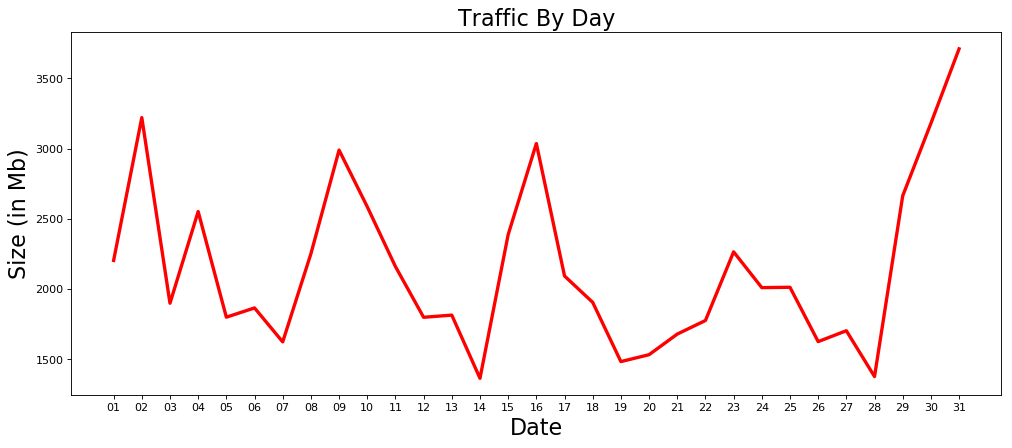

In [56]:
fig = plt.figure(figsize=(15, 6), dpi=80)
ax = fig.add_subplot(111)
ax.plot(size_by_day, color='red', linewidth=3)
# size_by_day.plot()
plt.title("Traffic By Day", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Size (in Mb)", fontsize=20)


Text(0,0.5,'Size (in Mb)')

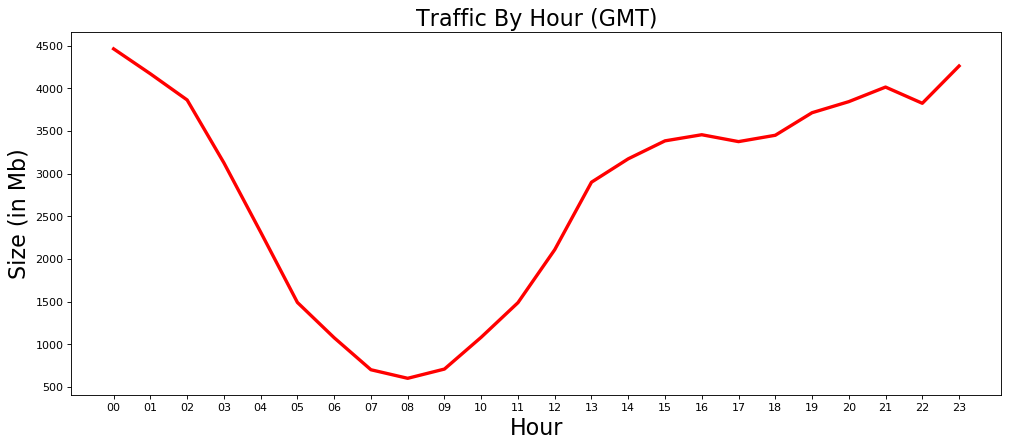

In [46]:
fig = plt.figure(figsize=(15, 6), dpi=80)
ax = fig.add_subplot(111)
ax.plot(size_by_hour, color='red', linewidth=3)
# size_by_hour.plot()
plt.title("Traffic By Hour (GMT)", fontsize=20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Size (in Mb)", fontsize=20)

Text(0,0.5,'Size (in Mb)')

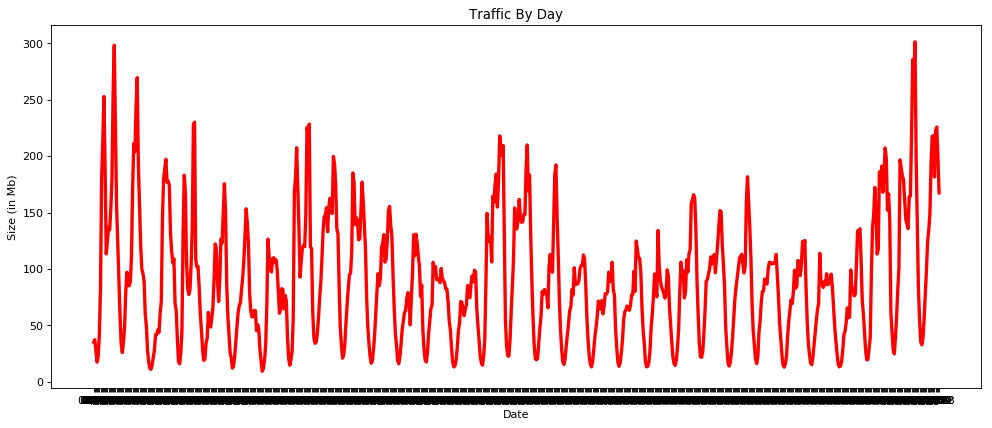

In [122]:
fig = plt.figure(figsize=(15, 6), dpi=80)
ax = fig.add_subplot(111)
ax.plot( size_by_dayHour, color='red', linewidth=3)
plt.title("Traffic By Day")
plt.xlabel("Date")
plt.ylabel("Size (in Mb)")
